In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)

In [5]:
df.Embarked = le.fit_transform(df.Embarked)
df.Embarked.value_counts()

Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = df['Sex']
y = df['Survived']

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit([X], [y])

KNeighborsClassifier()

In [8]:
df.Sex.unique()

array([1, 0])

In [9]:
df.Survived.unique()

array([0, 1], dtype=int64)

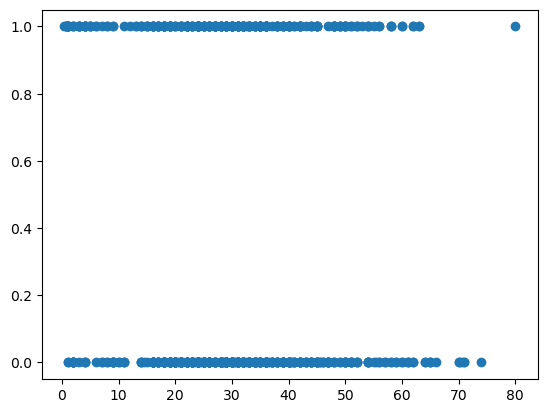

In [10]:
plt.scatter(df['Age'],df['Survived'])

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
df = df.drop(columns = ['Cabin'])

In [14]:
df.Age = df.Age.fillna(df.Age.mean())

In [15]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
print(df.Embarked.mode()[0])

2


In [17]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [18]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X = df[['Pclass','Sex','Age','Fare','Embarked']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_test,pred)
score

0.8156424581005587

In [22]:
cm = confusion_matrix(y_test, pred)
cm

array([[101,  14],
       [ 19,  45]], dtype=int64)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
pred1 = knn.predict(X_test)
score = accuracy_score(y_test,pred1)
score

0.7374301675977654

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 0.025,random_state = 101)
svm.fit(X_train, y_train)
svm.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [26]:
pred2 = svm.predict(X_test)
score2 = accuracy_score(y_test,pred1)
score2

0.7374301675977654

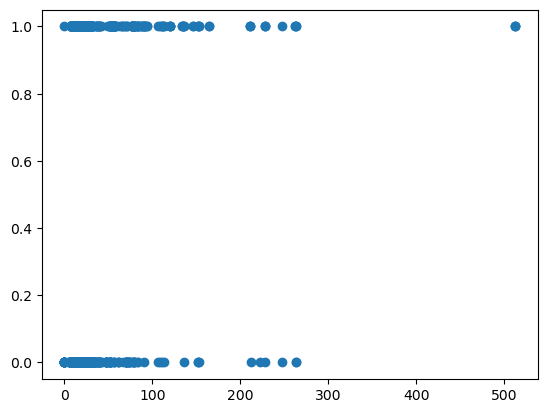

In [27]:
plt.scatter(df['Fare'],df['Survived'])

In [31]:
model.predict_proba(X_test)

array([[0.8708117 , 0.1291883 ],
       [0.09180558, 0.90819442],
       [0.92457909, 0.07542091],
       [0.8965274 , 0.1034726 ],
       [0.10065392, 0.89934608],
       [0.39126095, 0.60873905],
       [0.91204726, 0.08795274],
       [0.36780285, 0.63219715],
       [0.88432979, 0.11567021],
       [0.39126095, 0.60873905],
       [0.43061755, 0.56938245],
       [0.91206246, 0.08793754],
       [0.75993695, 0.24006305],
       [0.90225038, 0.09774962],
       [0.2622956 , 0.7377044 ],
       [0.78868504, 0.21131496],
       [0.08504184, 0.91495816],
       [0.8883068 , 0.1116932 ],
       [0.66362998, 0.33637002],
       [0.63299153, 0.36700847],
       [0.31539902, 0.68460098],
       [0.16767443, 0.83232557],
       [0.94705303, 0.05294697],
       [0.91206924, 0.08793076],
       [0.76539418, 0.23460582],
       [0.83125924, 0.16874076],
       [0.04793028, 0.95206972],
       [0.64512371, 0.35487629],
       [0.88425291, 0.11574709],
       [0.15990825, 0.84009175],
       [0.

In [32]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0,1


In [34]:
g = df.groupby("Survived")
for i, g_df in g:
    print(i)
    print(g_df.describe())

0
       PassengerId  Survived      Pclass         Sex         Age       SibSp  \
count   549.000000     549.0  549.000000  549.000000  549.000000  549.000000   
mean    447.016393       0.0    2.531876    0.852459   30.415100    0.553734   
std     260.640469       0.0    0.735805    0.354968   12.457370    1.288399   
min       1.000000       0.0    1.000000    0.000000    1.000000    0.000000   
25%     211.000000       0.0    2.000000    1.000000   23.000000    0.000000   
50%     455.000000       0.0    3.000000    1.000000   29.699118    0.000000   
75%     675.000000       0.0    3.000000    1.000000   35.000000    1.000000   
max     891.000000       0.0    3.000000    1.000000   74.000000    8.000000   

            Parch        Fare    Embarked  FamilySize  
count  549.000000  549.000000  549.000000  549.000000  
mean     0.329690   22.117887    1.641166    1.883424  
std      0.823166   31.388207    0.710081    1.830669  
min      0.000000    0.000000    0.000000    1.000000

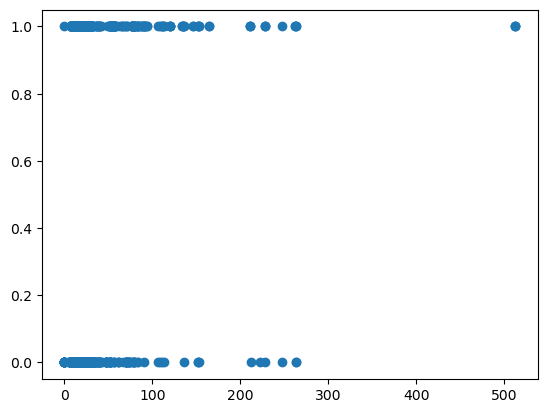

In [35]:
plt.scatter(df.Fare, df.Survived)

In [36]:
predsol = pd.DataFrame(predsol)

NameError: name 'predsol' is not defined

In [37]:
predsol = model.predict(X_train
                       )

In [38]:
predsol = pd.DataFrame(predsol)

In [44]:
predsol.shape


(712, 1)

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
dtype: object

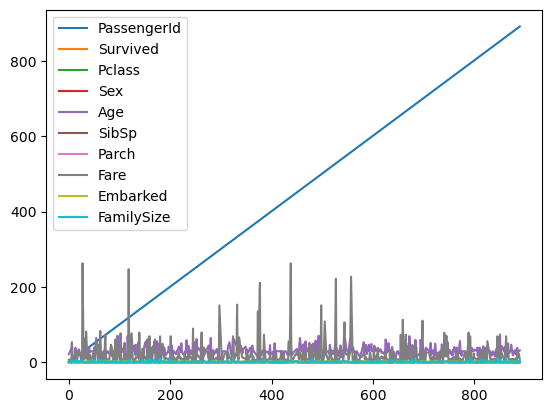

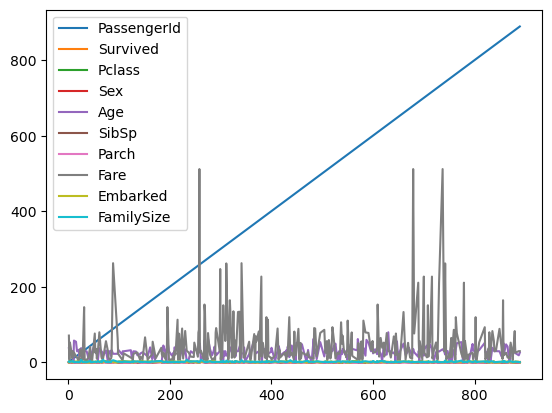

In [46]:
g.plot()

<Axes: >

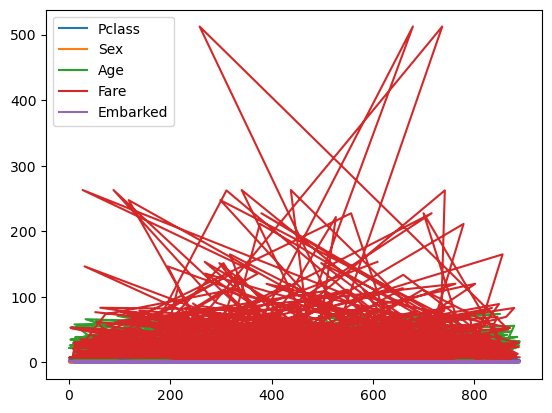

In [47]:
X_train.plot()

<Axes: >

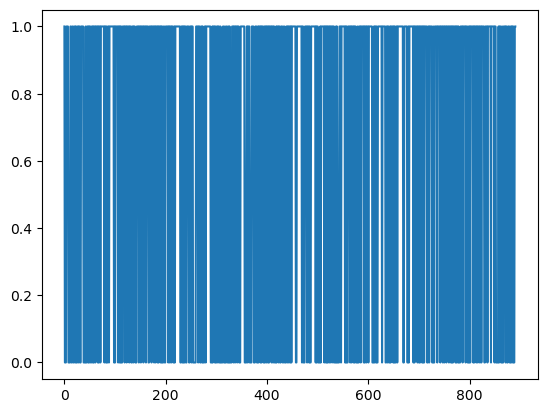

In [48]:
df['Sex'].plot()

<Axes: >

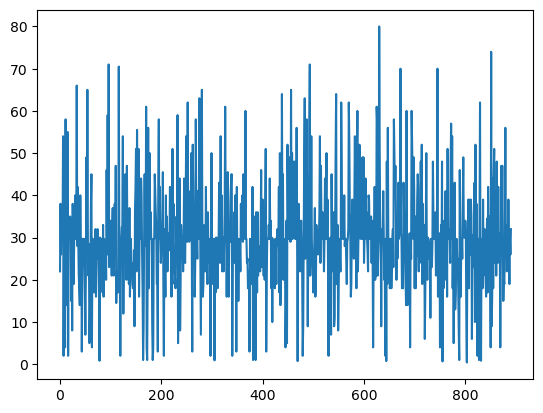

In [49]:
df.Age.plot()

<Axes: >

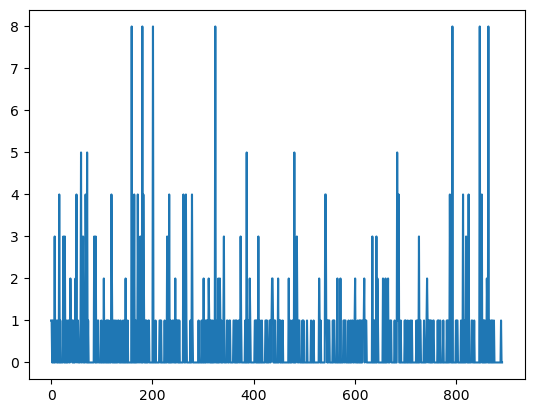

In [50]:
df.SibSp.plot()

<Axes: >

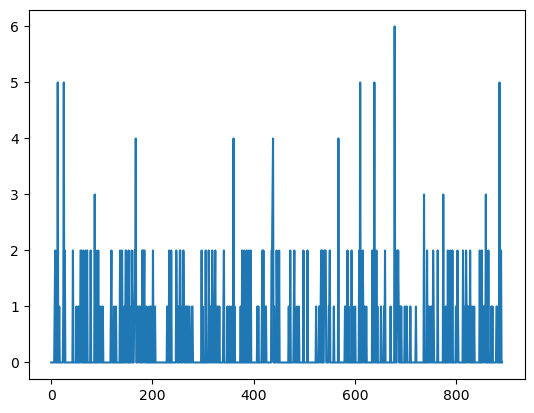

In [51]:
df.Parch.plot()